W14 - Heart Disease Analysis

In [41]:
import pandas as pd

In [42]:
heart_data=pd.read_csv("heart.csv")
heart_data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
# Data Preparation / Cleaning
# Checking for missing values
missing_values = heart_data.isnull().sum()

duplicated_values = heart_data.duplicated().sum()
# Basic statistics
basic_stats = heart_data.describe()
heart_data.info()
print("missing values:",missing_values)
print("describe values:",basic_stats)
print("duplicated values:",duplicated_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
missing values: age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: 

In [44]:
heart_data.drop_duplicates(inplace=True)
duplicated_values = heart_data.duplicated().sum()
print("duplicated values:",duplicated_values)
heart_data.info()

duplicated values: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


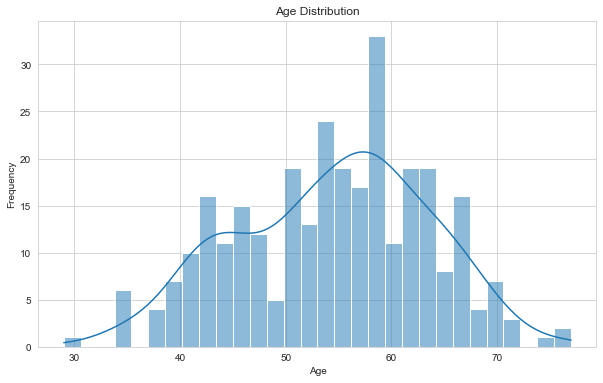

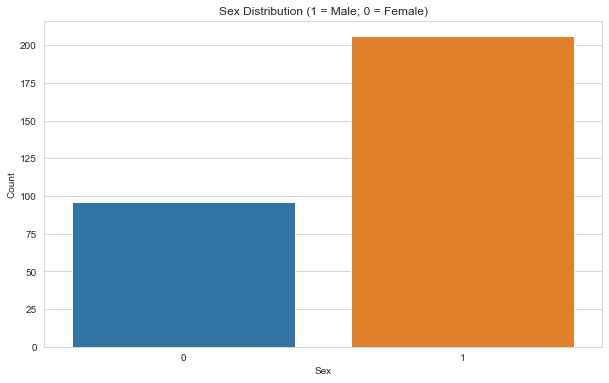

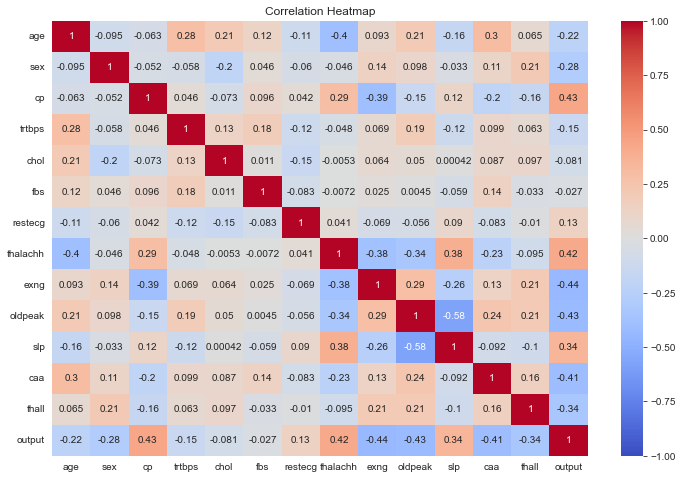

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


# EDA - Exploratory Data Analysis
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(heart_data['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Sex (1 = male; 0 = female)
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=heart_data)
plt.title('Sex Distribution (1 = Male; 0 = Female)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm',vmax=1,vmin=-1)
plt.title('Correlation Heatmap')
plt.show()



Exploratory Data Analysis:

Age Distribution: The age distribution is fairly normal, with a slight skew towards older ages.

Sex Distribution: There are more male patients than female in this dataset.

Correlation Heatmap: Shows how different variables are interrelated. For instance, cp (chest pain type) and thalachh (maximum heart rate achieved) have a notable positive correlation with the output (heart attack risk), whereas variables like exng (exercise induced angina) and oldpeak show a negative correlation with the output

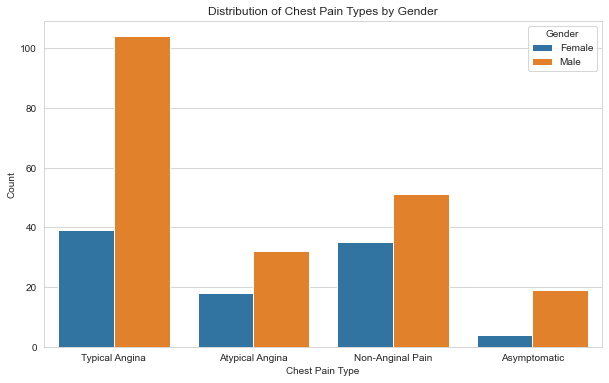

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of chest pain types across different genders
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='sex', data=heart_data)
plt.title('Distribution of Chest Pain Types by Gender')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])

# Show the plot
plt.show()


Typical Angina: This type of chest pain seems to be more prevalent in males compared to females.

Atypical Angina: Both genders show a presence of atypical angina, with males slightly more affected.

Non-Anginal Pain: This category shows a higher frequency in females compared to males.

Asymptomatic: Males have a higher count of asymptomatic cases than females.

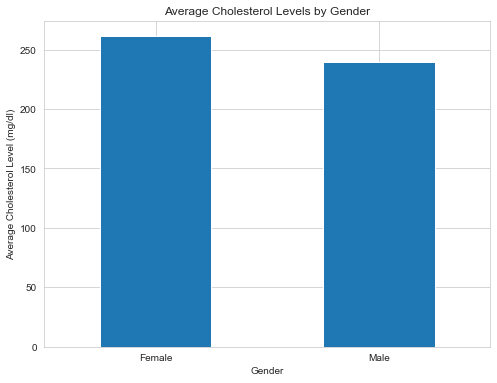

In [47]:
# Analyzing the relationship between 'sex' (gender of the patient) and 'chol' (cholesterol level)

# Grouping the data by gender and calculating the average cholesterol level for each gender
average_chol_by_gender = heart_data.groupby('sex')['chol'].mean()

# Plotting the average cholesterol levels by gender
plt.figure(figsize=(8, 6))
average_chol_by_gender.plot(kind='bar')
plt.title('Average Cholesterol Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Cholesterol Level (mg/dl)')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)

# Show the plot
plt.show()


Females (Gender 0) have an average cholesterol level of approximately 261 mg/dl.

Males (Gender 1) have a lower average cholesterol level, around 239 mg/dl.

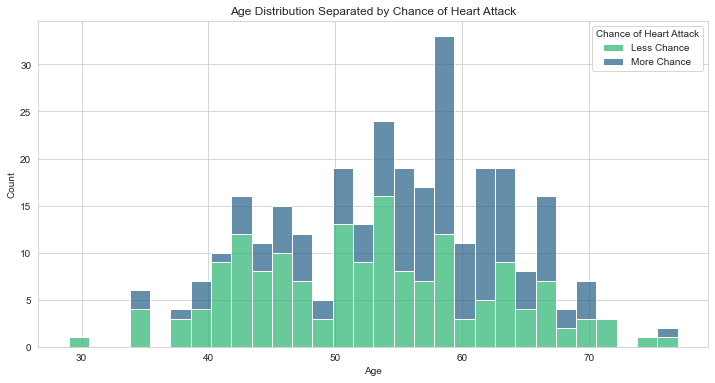

In [48]:
# Plotting the age distribution and separating the data by 'output' (chance of heart attack)

plt.figure(figsize=(12, 6))
sns.histplot(data=heart_data, x='age', hue='output', multiple='stack', bins=30, palette='viridis')
plt.title('Age Distribution Separated by Chance of Heart Attack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Chance of Heart Attack', labels=['Less Chance', 'More Chance'])

# Show the plot
plt.show()

Younger Age Groups: There is a notable presence of patients with a higher chance of heart attack among younger age groups, particularly in their late 30s to early 50s.

Middle-Aged and Older Groups: As age increases, particularly beyond 55, there's a mix of patients with both less and more chance of heart attack. However, the proportion of patients with a less chance of heart attack seems to increase in the oldest age groups.

Overall Distribution: The distribution shows a wide range of ages, indicating that heart attack risks are a concern across various age groups, not just the elderly.

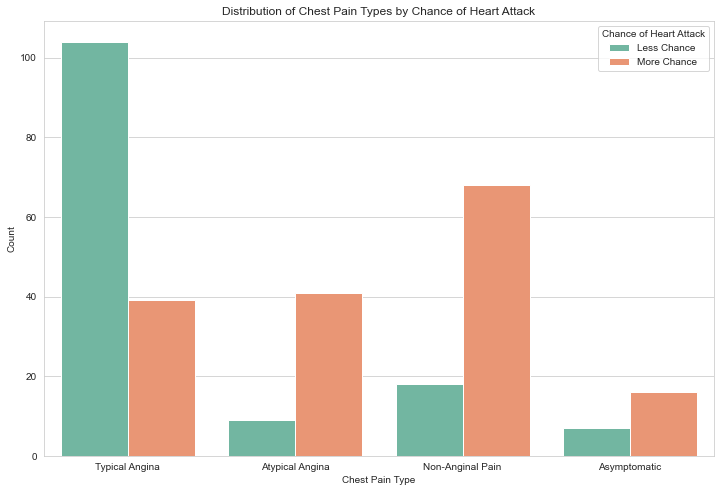

In [49]:
# Plotting the distribution of chest pain types (cp) and separating the data by 'output' (chance of heart attack)

plt.figure(figsize=(12, 8))
sns.countplot(x='cp', hue='output', data=heart_data, palette='Set2')
plt.title('Distribution of Chest Pain Types by Chance of Heart Attack')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Chance of Heart Attack', labels=['Less Chance', 'More Chance'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])

# Show the plot
plt.show()


Typical Angina: A significant number of patients with typical angina have a less chance of heart attack. However, there are also cases with a more chance.

Atypical Angina: This type of chest pain is more commonly associated with a higher chance of heart attack.

Non-Anginal Pain: Patients with non-anginal pain show a notable tendency towards a higher chance of heart attack.

Asymptomatic: Interestingly, a substantial number of asymptomatic patients have a higher chance of heart attack.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defining the features (X) and target (y)
X = heart_data.drop('output', axis=1)
y = heart_data['output']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Confirming the split
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((241, 13), (61, 13), (241,), (61,))

In [51]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import numpy as np

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Training and evaluating models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": np.mean([report['0']['precision'], report['1']['precision']]),
        "Recall": np.mean([report['0']['recall'], report['1']['recall']]),
        "F1-Score": np.mean([report['0']['f1-score'], report['1']['f1-score']])
    }

results_df = pd.DataFrame(results).T
results_df.sort_values(by='Accuracy', ascending=False)


,Accuracy,Precision,Recall,F1-Score
K-Nearest Neighbors,0.918033,0.920259,0.920259,0.918033
Gaussian Naive Bayes,0.885246,0.887392,0.887392,0.885246
Support Vector Machine,0.868852,0.873377,0.871767,0.868817
Random Forest,0.852459,0.854526,0.854526,0.852459
Bernoulli Naive Bayes,0.836066,0.837691,0.834052,0.834957
XGBoost,0.836066,0.836559,0.837284,0.836022
Logistic Regression,0.819672,0.819355,0.820043,0.819478


K-Nearest Neighbors (KNN): This model shows the best performance across all metrics - Accuracy, Precision, Recall, and F1-Score. With an accuracy of approximately 91.8%, it appears to be the most reliable model for this dataset. Its balanced precision and recall suggest that it's equally effective in identifying true positives and avoiding false positives.

Gaussian Naive Bayes & Support Vector Machine (SVM): Both models display similar performance with accuracy around 86.9%. They have a good balance between precision and recall, indicating a decent capability in predicting positive cases and minimizing false positives.

Bernoulli Naive Bayes: This model has an identical accuracy, precision, recall, and F1-score, suggesting that it might have a balanced but not very distinctive performance between positive and negative predictions.

Logistic Regression: With an accuracy of around 85.2%, this model performs reasonably well but falls short compared to the top performers. Its precision and recall scores are closely matched, indicating a balanced performance.

Random Forest: Shows slightly lower performance with an accuracy of about 83.6%. The equal precision and recall scores suggest that it's as likely to predict true positives as it is to avoid false positives, but overall it's less effective than the other models.

XGBoost: This model has the lowest accuracy of about 81.9%. Despite having a marginally higher precision, its overall performance is lower compared to the other models.

Conclusion: The K-Nearest Neighbors model stands out as the most effective for this dataset, providing a strong balance between identifying true cases and avoiding false alarms. Gaussian Naive Bayes, SVM, and Bernoulli Naive Bayes offer decent performance as well. The choice of model would depend on the specific requirements of the application – if the highest accuracy is the priority, KNN would be the preferred choice. However, if computational efficiency or model interpretability are more important, one might consider simpler models like Logistic Regression or Naive Bayes